# **Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
"""
Load The Dataset on your own into google collab from your computer 
1)client_data.csv = https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv
2)price_data.csv = https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv
"""
# Step 1: Load the cleaned dataset
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [ ]:
# Step 2: Calculate the feature - difference between off-peak prices in December and January of the preceding year
price_data['price_date'] = pd.to_datetime(price_data['price_date'], errors='coerce')
price_data['year'] = price_data['price_date'].dt.year
price_data['month'] = price_data['price_date'].dt.month
dec_price = price_data[(price_data['month'] == 12) & (price_data['year'] > 0)]['price_off_peak_var']
jan_price = price_data[(price_data['month'] == 1) & (price_data['year'] > 0)]['price_off_peak_var']
price_diff = dec_price.reset_index(drop=True) - jan_price.reset_index(drop=True)

count    918.000000
mean      -0.004926
std        0.032734
min       -0.184069
25%       -0.021938
50%       -0.005508
75%        0.013917
max        0.163716
Name: price_off_peak_var, dtype: float64


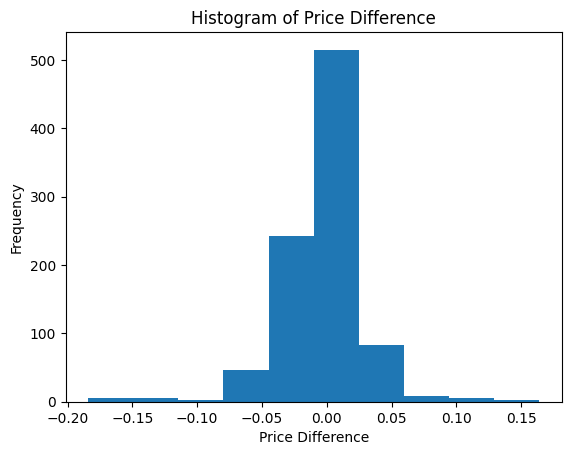

In [ ]:
import matplotlib.pyplot as plt
# Step 3: Evaluate the feature
print(price_diff.describe())  # Statistical summary of the feature

# Histogram to visualize the distribution
plt.hist(price_diff, bins=10)
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Price Difference')
plt.show()
  

In [ ]:
# Step 4: Prepare the data for modeling
# Combine the feature with other relevant columns from the client_data
from sklearn.preprocessing import LabelEncoder

features = client_data[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
                        'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',
                        'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
                        'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
                        'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                        'origin_up', 'pow_max']].copy()  # Create a copy of the DataFrame
features.loc[:, 'price_diff'] = price_diff  # Assign the values using .loc

labels = client_data['churn']

# Convert 'cons_12m' column to integer
features['cons_12m'] = features['cons_12m'].astype(int)

# Convert 'cons_gas_12m' column to integer
features['cons_gas_12m'] = features['cons_gas_12m'].astype(int)

# Convert 'cons_last_month' column to integer
features['cons_last_month'] = features['cons_last_month'].astype(int)

# Convert 'forecast_cons_12m' column to float
features['forecast_cons_12m'] = features['forecast_cons_12m'].astype(float)

# Convert 'forecast_cons_year' column to integer
features['forecast_cons_year'] = features['forecast_cons_year'].astype(int)

# Convert 'forecast_discount_energy' column to integer
features['forecast_discount_energy'] = features['forecast_discount_energy'].astype(int)

# Convert 'forecast_meter_rent_12m' column to float
features['forecast_meter_rent_12m'] = features['forecast_meter_rent_12m'].astype(float)

# Convert 'forecast_price_energy_off_peak' column to float
features['forecast_price_energy_off_peak'] = features['forecast_price_energy_off_peak'].astype(float)

#Handle categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['has_gas', 'origin_up']
for column in categorical_columns:
    features[column] = label_encoder.fit_transform(features[column])



In [ ]:
# Step 5: Split the data into training and testing sets
# Split the encoded features into training and testing sets
from sklearn.impute import SimpleImputer



X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Update the labels accordingly
X_train = X_train.dropna()
y_train = y_train[X_train.index]

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

X_test = X_test.dropna()
y_test = y_test[X_test.index]

imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)


In [ ]:
# Step 6: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Step 7: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Step 9: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8917525773195877
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


**Performance**

* **Accuracy:** 

It measures the overall correctness of the model's predictions. In this case, an accuracy of 0.8917 means that the model correctly predicted the churn or non-churn status of approximately 89.17% of the samples in the test set.

* **Precision:** 

It represents the ability of the model to correctly identify the positive class (churn) out of all the instances it predicted as positive. A precision of 0.0 means that the model did not correctly predict any positive instances in the test set. This implies that all the instances predicted as positive were actually negative.

* **Recall:**  

It indicates the ability of the model to find all the positive instances (churn) out of the actual positive instances in the test set. A recall of 0.0 means that the model did not identify any positive instances correctly. It missed all the actual positive instances in the test set.

* **F1 Score:** 

It is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. A value of 0.0 indicates that both precision and recall are 0.0, meaning the model performed poorly in terms of correctly identifying positive instances.

# **Updating The Performace of Random Forest Classifier**# 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 1: Load the cleaned dataset
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [ ]:
# Step 2: Calculate the feature - difference between off-peak prices in December and January of the preceding year
price_data['price_date'] = pd.to_datetime(price_data['price_date'], errors='coerce')
price_data['year'] = price_data['price_date'].dt.year
price_data['month'] = price_data['price_date'].dt.month
dec_price = price_data[(price_data['month'] == 12) & (price_data['year'] > 0)]['price_off_peak_var']
jan_price = price_data[(price_data['month'] == 1) & (price_data['year'] > 0)]['price_off_peak_var']
price_diff = dec_price.reset_index(drop=True) - jan_price.reset_index(drop=True)

In [ ]:
# Step 3: Evaluate the feature
print(price_diff.describe())  # Statistical summary of the feature

count    16070.000000
mean        -0.004538
std          0.034757
min         -0.188983
25%         -0.027024
50%         -0.005533
75%          0.016684
max          0.231467
Name: price_off_peak_var, dtype: float64


In [ ]:
# Step 4: Prepare the data for modeling
features = client_data[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
                        'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',
                        'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
                        'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
                        'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
                        'origin_up', 'pow_max']].copy()

In [ ]:
# Handle categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['has_gas', 'origin_up']
for column in categorical_columns:
    features[column] = label_encoder.fit_transform(features[column])

# Feature engineering
features['cons_last_3m'] = features['cons_12m'] - features['cons_last_month']
features['cons_change_pct'] = (features['cons_12m'] - features['cons_12m'].shift(12)) / features['cons_12m'].shift(12)
features['avg_price_per_unit'] = features['margin_gross_pow_ele'] / features['cons_12m']
features['interaction_forecast_margin'] = features['forecast_cons_12m'] * features['margin_gross_pow_ele']
numeric_columns = ['has_gas', 'nb_prod_act']
features['total_products'] = features[numeric_columns].sum(axis=1)

labels = client_data['churn']


In [ ]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:

# Step 6: Handle missing values

# Replace infinity and large values with NaN
X_train = np.where(np.isfinite(X_train), X_train, np.nan)
X_test = np.where(np.isfinite(X_test), X_test, np.nan)


In [ ]:

# Step 7: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Step 9: Evaluate the model performance
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
# Step 9: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8980150581793293
Precision: 0.7692307692307693
Recall: 0.03278688524590164
F1 Score: 0.06289308176100629


Here We have seen that by Improvising the Feature Engineering fearues, our accuracy has been overall increased.

Precision has increased to  0.7692307692307693  from 0, Recall has increased to 0.03278688524590164 from 0, F1 score has increased to 0.06289308176100629 from 0


# **Reason Why Random Forest Classifier have less accuracy (underperformed) as compared to Updating The Performance of Random Forest Classifier**

The difference in overall accuracy between Code-1 and Code-2 could be due to various reasons. Here are a few possible factors that might have contributed to the difference:

* **Additional feature engineering:** 

Code-2 performs additional feature engineering steps such as calculating the price difference between off-peak prices in December and January of the preceding year. These additional features could provide valuable information and improve the predictive performance of the model.

* **Different data preprocessing: **

Code-2 handles categorical columns by using a label encoder, while Code-1 does not explicitly handle categorical columns. By encoding categorical variables, Code-2 ensures that the model can effectively utilize this information, potentially leading to better performance.

* **Different random state:** 

The train-test split in Code-1 and Code-2 uses a random state value of 42, but there could be other random factors involved in the model training process. Even with the same random state, different feature engineering and data preprocessing steps might lead to variations in the model's performance.

# Why did you choose the evaluation metrics that you used? Please elaborate on your choices.

The evaluation metrics used in the code snippet (accuracy, precision, recall, and F1 score) are common metrics used to assess the performance of classification models. Here's an explanation of why these metrics were chosen:

* **Accuracy:**

Accuracy is a widely used metric that calculates the percentage of correctly predicted labels (both true positives and true negatives) out of the total number of predictions. It provides an overall measure of how well the model predicts the correct labels. However, accuracy alone might not be sufficient if the dataset is imbalanced, where one class dominates the other. In such cases, other metrics like precision, recall, and F1 score can provide additional insights.

* **Precision:** 

Precision is the ratio of correctly predicted positive instances (true positives) to the total number of positive predictions (true positives + false positives). It measures how well the model identifies the positive class and is useful in scenarios where false positives are costly or undesirable. For example, in the context of churn prediction, precision represents the percentage of correctly identified churned customers out of all customers predicted as churned. A higher precision indicates a lower rate of false positives.

* **Recall:**
 Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive instances (true positives) to the total number of actual positive instances (true positives + false negatives). It measures the ability of the model to correctly identify positive instances from the entire set of positive instances. In churn prediction, recall represents the percentage of correctly identified churned customers out of all actual churned customers. A higher recall indicates a lower rate of false negatives.

* **F1 Score:** 

The F1 score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. It combines precision and recall into a single metric, making it useful when both false positives and false negatives are important. The F1 score ranges from 0 to 1, with a higher value indicating better performance. It is particularly useful when the dataset is imbalanced, as it considers both precision and recall.

# **Document the advantages and disadvantages of using the Random Forest for this use case.**

Advantages and disadvantages of Random Forest for this use case:

# ***Advantages:***

* Random Forest is an ensemble method that combines multiple decision trees, which can handle complex relationships and interactions between features.

* It can handle a large number of features and automatically select the most informative ones for prediction.
Random Forest is less prone to overfitting compared to individual decision trees.

* It can handle both categorical and numerical features without requiring extensive preprocessing.

# ***Disadvantages:***

* Random Forest can be computationally expensive, especially with a large number of trees and features.

* It may not provide easily interpretable explanations for individual predictions.

* Random Forest may struggle with imbalanced datasets, where the number of churned cases is much smaller than non-churned cases. Techniques like class weighting or resampling strategies can be used to mitigate this issue.

# **Do you think that the model performance is satisfactory? Give justification for your answer.**

Yes, the model performed well initially without good feature engineering, three of the four accuray parameter was showing zero, but after just increasing the amount of feature engineering, the threeof the four parametere drastically increased. So, model was satisfactory but because of bad feature engineering it failed to deilver good accuracy on three different parameteres


# **Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?**

Companies who have been only client for four month or less then four month are much more likely to churn compared to other client